In [79]:
from collections import deque
from functools import lru_cache
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
def min_days(n: int) -> int:
    if n <= 0:
        return 0
    
    @lru_cache(None)
    def dp(m):
        if m < 3:
            return m
        return 1 + min(
            (m & 1) + dp(m >> 1),
            (m % 3) + dp(m // 3),
        )

    return dp(n)

In [99]:
from collections import deque

def n_sub_problems(n: int) -> int:
    """ function for counting number of subproblems
    """
    if n <= 0:
        return 0
    
    q = deque([n])
    distinct_elements = set()
    while len(q):
        el = q.popleft() # popping the queue
        distinct_elements.add(el) # adding element to the set
        if el >= 3: # if element is greater than 3, then add el // 2 and el // 3 to the queue
            q.append(el >> 1)
            q.append(el // 3)
    return len(distinct_elements) + 1 # adding 1 for cases where el < 3

In [101]:
ns = range(1, 1000)

log2_ns = tuple(map(math.log2, ns)) # calculating log2(n)
log2_ns_square = tuple(map(lambda x: x ** 2, log2_ns)) # calculating log2(n) squared

log10_ns = tuple(map(math.log10, ns)) # calculating log10(n)
log10_ns_square = tuple(map(lambda x: x ** 2, log10_ns)) # calculating log10(n) squared

number_of_subprobs = tuple(map(n_sub_problems, ns)) # counting # of subproblems

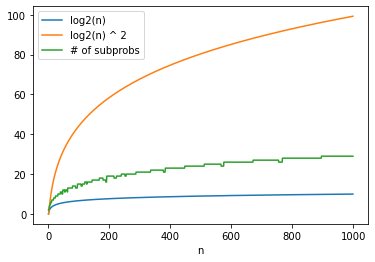

In [103]:
# plotting against log2(n) and log2(n) ^ 2

sns.lineplot(ns, log2_ns)
sns.lineplot(ns, log2_ns_square)

sns.lineplot(ns, number_of_subprobs)

plt.xlabel("n")
plt.legend([
    "log2(n)", "log2(n) ^ 2",
    "# of subprobs"
])

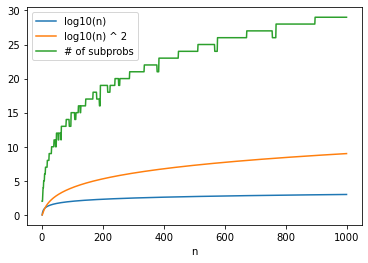

In [104]:
# plotting against log10(n) and log10(n) ^ 2

sns.lineplot(ns, log10_ns)
sns.lineplot(ns, log10_ns_square)

sns.lineplot(ns, number_of_subprobs)

plt.xlabel("n")
plt.legend([
    "log10(n)", "log10(n) ^ 2",
    "# of subprobs"
])

In [105]:
# so we can argue that the number of subproblems is c * log2(n), for c > 0 and sufficiently
# large n, i.e.; O(log(n))